In [21]:
#Importing
import pandas as pd
import numpy as np
import math
from Potato import plotparams
import matplotlib.pyplot as plt

In [22]:
#This is to read my csv files
Gaia0 = pd.read_csv('Index0_GaiaX')
Gaia1 = pd.read_csv('Index1_GaiaX')

#Extinciton files
Ext13_13_5 = pd.read_csv('index_13_13.5_subset.csv')
Ext13_5_14 = pd.read_csv('index_13.5_14_subset.csv')

/var/folders/tg/9q1zz56d7qs4655vs65rm14m0000gn/T/ipykernel_22581/3102925035.py:2: DtypeWarning: Columns (6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  Gaia0 = pd.read_csv('Index0_GaiaX')
/var/folders/tg/9q1zz56d7qs4655vs65rm14m0000gn/T/ipykernel_22581/3102925035.py:3: DtypeWarning: Columns (6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  Gaia1 = pd.read_csv('Index1_GaiaX')


In [23]:
#Removing bad (negative) parallaxes
gplx0 = Gaia0.loc[Gaia0['plx'] > 0].reset_index(drop=True)
gplx1 = Gaia1.loc[Gaia1['plx'] > 0].reset_index(drop=True)

In [24]:
#Finding the corresponding Extinction
Ext13ID0 = gplx0['asas_sn_id']
Ext13_0 = pd.DataFrame()
for i in Ext13ID0:
    row = Ext13_13_5.loc[Ext13_13_5['asas_sn_id'] == i].reset_index(drop=True)
    Ext13_0 = pd.concat([Ext13_0,row]).reset_index(drop=True)

Ext14ID0 = gplx0['asas_sn_id']
Ext14_0 = pd.DataFrame()
for i in Ext14ID0:
    row = Ext13_5_14.loc[Ext13_5_14['asas_sn_id'] == i].reset_index(drop=True)
    Ext14_0 = pd.concat([Ext14_0,row]).reset_index(drop=True)

Ext0 = pd.concat([Ext13_0,Ext14_0])


Ext13ID1 = gplx1['asas_sn_id']
Ext13_1 = pd.DataFrame()
for i in Ext13ID1:
    row = Ext13_13_5.loc[Ext13_13_5['asas_sn_id'] == i].reset_index(drop=True)
    Ext13_1 = pd.concat([Ext13_1,row]).reset_index(drop=True)

Ext14ID1 = gplx1['asas_sn_id']
Ext14_1 = pd.DataFrame()
for i in Ext14ID1:
    row = Ext13_5_14.loc[Ext13_5_14['asas_sn_id'] == i].reset_index(drop=True)
    Ext14_1 = pd.concat([Ext14_1,row]).reset_index(drop=True)

Ext1 = pd.concat([Ext13_1,Ext14_1])

In [25]:
#Add the extinction to dataframes
AID130 = Ext0['asas_sn_id']
gp0 = gplx0['asas_sn_id']
df0 = pd.DataFrame()
for i in AID130:
    row = gplx0.loc[gplx0['asas_sn_id'] == i].reset_index(drop=True)
    df0 = pd.concat([df0,row]).reset_index(drop=True)
df0E = df0.merge(Ext0[['mwdust_av','mwdust_ag','mwdust_abp','mwdust_arp','asas_sn_id']], on='asas_sn_id',how='left')


AID131 = Ext1['asas_sn_id']
gp1 = gplx1['asas_sn_id']
df1 = pd.DataFrame()
for i in AID131:
    row = gplx1.loc[gplx1['asas_sn_id'] == i].reset_index(drop=True)
    df1 = pd.concat([df1,row]).reset_index(drop=True)
df1E = df1.merge(Ext1[['mwdust_av','mwdust_ag','mwdust_abp','mwdust_arp','asas_sn_id']], on='asas_sn_id',how='left')

In [26]:
target_data = {
    'RA': 134.56516643356,
    'DEC': -43.16525434891,
    'plx':	0.9613,
    'plx_e': 0.0602,
    'Gmag': 11.764850,
    'Bpmag': 12.186064,
    'Rpmag': 11.159019,
    'Gdust': 2.299445046386098,
    'Bpdust': 2.9202077775397592,
    'Rpdust': 1.7165692424859462}
df_target = pd.DataFrame(data=target_data, index=[0])
df_target.head()

,RA,DEC,plx,plx_e,Gmag,Bpmag,Rpmag,Gdust,Bpdust,Rpdust
0,134.565166,-43.165254,0.9613,0.0602,11.76485,12.186064,11.159019,2.299445,2.920208,1.716569


In [28]:
#mag = -2.5log10(flux)
mag0 = df0E['Gmag']
dist0 = 1000/df0E['plx']
Mag0 = []
for i in range(len(mag0)):
    Mag0.append(mag0[i] + 5 - (5 * math.log10(dist0[i])) - df0E['mwdust_ag'][i])

mag1 = df1E['Gmag']
dist1 = 1000/df1E['plx']
Mag1 = []
for i in range(len(mag1)):
    Mag1.append(mag1[i] + 5 - (5 * math.log10(dist1[i])) - df1E['mwdust_ag'][i])

Mag_target = df_target.Gmag + 5 - (5*math.log10(1000/df_target.plx)) - df_target.Gdust

print(Mag_target)

0   -0.6203
dtype: float64


/var/folders/tg/9q1zz56d7qs4655vs65rm14m0000gn/T/ipykernel_22581/1072332214.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Mag_target = df_target.Gmag + 5 - (5*math.log10(1000/df_target.plx)) - df_target.Gdust


In [29]:
#Color
bp0 = df0E['BPmag']
rp0 = df0E['RPmag']
BP0 = []
RP0 = []
for i in range(len(bp0)):
    BP0.append(bp0[i] + 5 - (5 * math.log10(dist0[i])) - df0E['mwdust_abp'][i])
for i in range(len(rp0)):
    RP0.append(rp0[i] + 5 - (5 * math.log10(dist0[i])) - df0E['mwdust_arp'][i])
bprp0 = [x - y for x, y in zip(BP0,RP0)]

bp1 = df1E['BPmag']
rp1 = df1E['RPmag']
BP1 = []
RP1 = []
for i in range(len(bp1)):
    BP1.append(bp1[i] + 5 - (5 * math.log10(dist1[i])) - df1E['mwdust_abp'][i])
for i in range(len(rp1)):
    RP1.append(rp1[i] + 5 - (5 * math.log10(dist1[i])) - df1E['mwdust_arp'][i])
bprp1 = [x - y for x, y in zip(BP1,RP1)]

bp_target = df_target.Bpmag + 5 - (5*math.log10(1000/df_target.plx)) - df_target.Bpdust
rp_target = df_target.Rpmag + 5 - (5*math.log10(1000/df_target.plx)) - df_target.Rpdust
bprp_target = bp_target - rp_target

/var/folders/tg/9q1zz56d7qs4655vs65rm14m0000gn/T/ipykernel_22581/4110927093.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bp_target = df_target.Bpmag + 5 - (5*math.log10(1000/df_target.plx)) - df_target.Bpdust
/var/folders/tg/9q1zz56d7qs4655vs65rm14m0000gn/T/ipykernel_22581/4110927093.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rp_target = df_target.Rpmag + 5 - (5*math.log10(1000/df_target.plx)) - df_target.Rpdust


BP-RP 0   -0.176594
dtype: float64
Gmag 0   -0.6203
dtype: float64


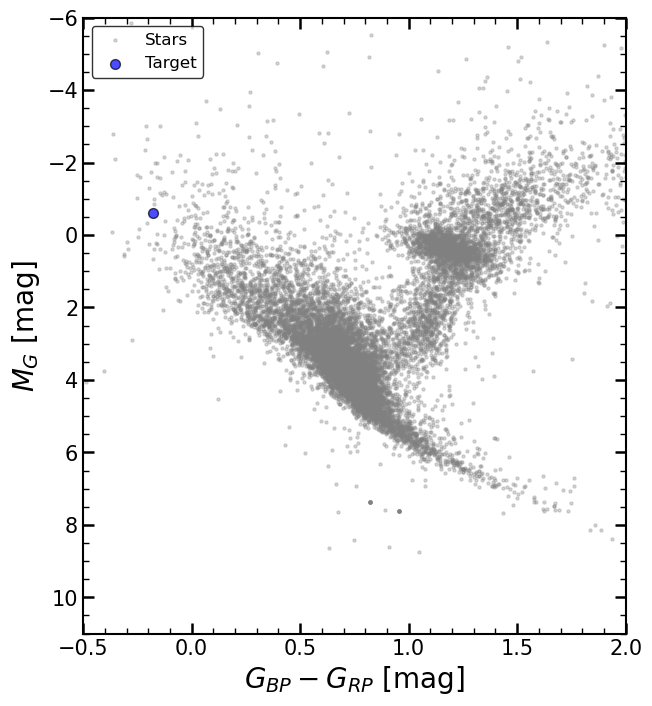

In [32]:
#Plot
print('BP-RP', bprp_target)
print('Gmag', Mag_target)

fig, ax = plt.subplots(1, 1, figsize=(7, 8))
ax = plotparams(ax)
ax.scatter(bprp0, Mag0, s=5, color='grey', alpha=0.3)
ax.scatter(bprp1, Mag1, s=5, color='grey', alpha=0.3, label='Stars')
ax.scatter(bprp_target, Mag_target, s=50, color='blue', alpha=0.7, label='Target', edgecolors='black')
ax.invert_yaxis()
ax.set_xlim(-0.5,2)
ax.set_ylim(11,-6)
ax.set_xlabel('$G_{BP} - G_{RP}$ [mag]', fontsize=20)
ax.set_ylabel('$M_G$ [mag]', fontsize=20)
ax.legend(fontsize='large',edgecolor='black')